# Micro Ring Resonator (MRR)

**We use SiEPIC EBeam library in this tutorial.**

   This notebook walks through the process of setting up and simulating a micro ring resonator device using the OPICS package. 

   A ring resonator consists of an optical waveguide which is looped back on itself, such that a resonance occurs when the optical path length of the resonator is exactly a whole number of wavelengths. In simple terms, an all pass ring resonator can be thought of consisting input/output components, evanescent coupling region like a directional coupler, and a waveguide (as shown below).
<img style="width:70%;height:50%;" src="../_static/mrr1.svg">

In [1]:
import time, warnings
import numpy as np
import matplotlib.pyplot as plt
import opics


   ____  ____  _______________
  / __ \/ __ \/  _/ ____/ ___/
 / / / / /_/ // // /    \__ \
/ /_/ / ____// // /___ ___/ /
\____/_/   /___/\____//____/

OPICS version 0.2.1


### Import component library
Import `ebeam` library from `libs` module.

In [2]:
ebeam = opics.libraries.ebeam

### Define network 
Create an instance of `Network` class, which is used to add, connect, and simulate circuit components. 

In [3]:
circuit_name = "mrr"
circuit = opics.Network(circuit_name)

### Add circuit components
Add grating couplers, evanescent coupler (e.g. directional coupler halfring), and a waveguide. You can define custom frequency data points for a component as well (see the example for output_GC).

In [4]:

input_gc = circuit.add_component(ebeam.GC())
output_gc = circuit.add_component(ebeam.GC())
wg = circuit.add_component(ebeam.Waveguide(length=np.pi*5e-6))
dc_halfring = circuit.add_component(ebeam.DC_halfring())


### Define circuit connectivity

In this section, we define the component connections. The connections are defined using `Network.connect`, e.g.`Network.connect(component1, component1_port, component2, component2_port)`

In [5]:
#connect components
circuit.connect(input_gc, 1, dc_halfring, 0)
circuit.connect(dc_halfring, 1, wg, 0)
circuit.connect(wg, 1, dc_halfring, 3)
circuit.connect(dc_halfring,2, output_gc,1)

### Simulate the circuit

In [6]:
warnings.filterwarnings('ignore') #ignore all/complex number warnings from numpy or scipy
sim_start = time.time()

#simulate network
circuit.simulate_network()

print("simulation finished in %ss"%(str(round(time.time()-sim_start,2))))

simulation finished in 0.01s


### Visualize the simulation result

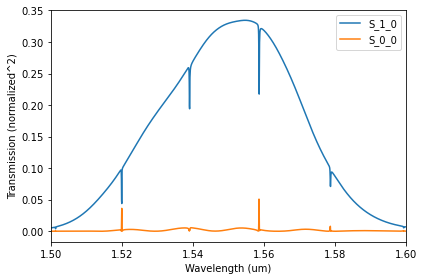

In [7]:
circuit.sim_result.plot_sparameters(show_freq = False, scale="abs_sq", ports = [[1,0], [0,0]])